In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer


In [2]:
dfs = pd.read_html("https://www.pgatour.com/stats/stat.02567.html")
df_drive = pd.read_html("https://www.pgatour.com/stats/stat.101.html")
df_sg_atg = pd.read_html("https://www.pgatour.com/stats/stat.02568.html")
df_three_putt = pd.read_html("https://www.pgatour.com/stats/stat.426.html")
df_short_acc = pd.read_html("https://www.pgatour.com/stats/stat.374.html")
df_drive_acc = pd.read_html("https://www.pgatour.com/stats/stat.102.html")
df_results = pd.read_html("https://en.wikipedia.org/wiki/Masters_Tournament")

In [3]:
df_current_players = pd.read_csv('current_players.csv',encoding = "ISO-8859-1")

In [4]:
df_current_players

,PLAYER NAME
0,Abraham Ancer
1,Daniel Berger
2,Christiaan Bezuidenhout
3,Patrick Cantlay
4,Paul Casey
...,...
83,Danny Willett
84,Matthew Wolff
85,Gary Woodland
86,Ian Woosnam


In [5]:
df_sg_off_the_tee = dfs[1]
df_drive = df_drive[1]
df_sg_atg = df_sg_atg[1]
df_three_putt = df_three_putt[1]
df_short_acc = df_short_acc[1]
df_drive_acc = df_drive_acc[1]
df_results = df_results[4]

In [6]:
df_three_putt = df_three_putt[['PLAYER NAME','%']].copy()
df_drive_acc = df_drive_acc[['PLAYER NAME','%']].copy()
df_results = df_results[['Champion','Year']].copy()
df_three_putt.columns = ['PLAYER NAME', '3 PUTT %']
df_drive_acc.columns = ['PLAYER NAME', 'Fairway %']
df_results.columns = ['PLAYER NAME', 'Year']

In [7]:
df_sg_off_the_tee = df_sg_off_the_tee[['PLAYER NAME','AVERAGE']].copy()
df_drive = df_drive[['PLAYER NAME','AVG.']].copy()
df_sg_atg = df_sg_atg[['PLAYER NAME','AVERAGE']].copy()
df_short_acc = df_short_acc[['PLAYER NAME','AVG DTP']].copy()

In [8]:
df_drive_acc.head(10)

,PLAYER NAME,Fairway %
0,Brendon Todd,73.62
1,Ryan Moore,72.62
2,Abraham Ancer,72.45
3,Brian Stuard,71.64
4,Webb Simpson,71.12
5,Kevin Kisner,70.71
6,Brice Garnett,70.60
7,Ryan Armour,70.15
8,Collin Morikawa,70.03
9,Corey Conners,70.00


In [9]:
data_frames = [df_drive_acc,df_short_acc,df_three_putt,df_sg_atg,df_sg_off_the_tee,df_drive ]

In [10]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['PLAYER NAME'],
                                            how='outer'), data_frames)


In [11]:
df_losers = df_merged

In [12]:
df_losers.tail(50)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.
166,Ryan Brehm,55.58,"9' 5""",2.95,-0.791,0.355,310.7
167,Charley Hoffman,55.30,"7' 8""",3.06,0.593,0.369,306.5
168,Padraig Harrington,55.05,"7' 11""",3.15,-0.218,-0.127,300.4
169,Kevin Stadler,55.05,"8' 5""",3.09,-0.306,-0.669,283.8
170,Hunter Mahan,54.95,"9' 8""",3.97,-1.336,-0.025,296.1
171,Aaron Wise,54.90,"7' 9""",5.18,0.344,0.289,302.5
172,Tony Finau,54.83,"6' 10""",2.88,0.547,0.354,304.9
173,Will Gordon,54.82,"9' 5""",3.21,-0.058,0.328,314.6
174,Brooks Koepka,54.73,"8' 8""",3.47,0.544,0.388,307.7
175,Robert MacIntyre,54.55,"7' 10""",5.30,-0.707,-0.069,299.4


In [13]:
dfs = [df_merged, df_results]

In [14]:
dffs = [df_merged, df_current_players]

In [15]:
df_merged_results = reduce(lambda  left,right: pd.merge(left,right,on=['PLAYER NAME'],
                                            how='inner'), dfs)

In [16]:
df_merged_players = reduce(lambda  left,right: pd.merge(left,right,on=['PLAYER NAME'],
                                            how='inner'), dffs)

In [17]:
df_merged_results = df_merged_results.sort_values(by="Year")

In [18]:
df_merged_results

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Year
7,Phil Mickelson,50.19,"8' 1""",4.09,0.001,-0.512,300.8,1991
1,Matt Kuchar,67.48,"9' 0""",1.89,0.085,-0.278,287.4,1998
0,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,2005
4,Hideki Matsuyama,61.63,"7' 7""",2.68,0.519,0.135,296.8,2011
5,Patrick Cantlay,61.49,"6' 8""",3.26,0.558,0.434,301.8,2012
6,Bryson DeChambeau,57.71,"7' 7""",3.27,0.696,1.144,321.1,2016
2,Doug Ghim,65.60,"6' 11""",3.80,0.542,0.137,295.1,2018
3,Viktor Hovland,63.65,"7' 8""",3.22,0.172,0.826,301.1,2019


In [19]:
df_merged_results['Year'] = 1

In [20]:
df_merged_results.columns = ['PLAYER NAME','Fairway %','AVG DTP','3 PUTT %','AVERAGE_x','AVERAGE_y','AVG.','Winner']

In [21]:
df_merged_results.tail(50)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
7,Phil Mickelson,50.19,"8' 1""",4.09,0.001,-0.512,300.8,1
1,Matt Kuchar,67.48,"9' 0""",1.89,0.085,-0.278,287.4,1
0,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,1
4,Hideki Matsuyama,61.63,"7' 7""",2.68,0.519,0.135,296.8,1
5,Patrick Cantlay,61.49,"6' 8""",3.26,0.558,0.434,301.8,1
6,Bryson DeChambeau,57.71,"7' 7""",3.27,0.696,1.144,321.1,1
2,Doug Ghim,65.60,"6' 11""",3.80,0.542,0.137,295.1,1
3,Viktor Hovland,63.65,"7' 8""",3.22,0.172,0.826,301.1,1


In [22]:
df_losers.tail(50)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.
166,Ryan Brehm,55.58,"9' 5""",2.95,-0.791,0.355,310.7
167,Charley Hoffman,55.30,"7' 8""",3.06,0.593,0.369,306.5
168,Padraig Harrington,55.05,"7' 11""",3.15,-0.218,-0.127,300.4
169,Kevin Stadler,55.05,"8' 5""",3.09,-0.306,-0.669,283.8
170,Hunter Mahan,54.95,"9' 8""",3.97,-1.336,-0.025,296.1
171,Aaron Wise,54.90,"7' 9""",5.18,0.344,0.289,302.5
172,Tony Finau,54.83,"6' 10""",2.88,0.547,0.354,304.9
173,Will Gordon,54.82,"9' 5""",3.21,-0.058,0.328,314.6
174,Brooks Koepka,54.73,"8' 8""",3.47,0.544,0.388,307.7
175,Robert MacIntyre,54.55,"7' 10""",5.30,-0.707,-0.069,299.4


In [23]:
df_losers['Winner'] = 0

In [24]:
df_losers.iloc[:50]

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
0,Brendon Todd,73.62,"7' 5""",2.24,-0.509,-0.298,275.6,0
1,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,0
2,Abraham Ancer,72.45,"7' 5""",2.58,0.384,0.290,290.5,0
3,Brian Stuard,71.64,"7' 0""",2.43,-0.110,-0.003,280.1,0
4,Webb Simpson,71.12,"7' 3""",2.78,0.293,0.247,292.7,0
5,Kevin Kisner,70.71,"8' 7""",2.22,0.049,-0.233,286.7,0
6,Brice Garnett,70.60,"8' 6""",2.78,-0.394,0.170,288.6,0
7,Ryan Armour,70.15,"7' 9""",2.31,-0.247,-0.149,279.8,0
8,Collin Morikawa,70.03,"6' 10""",2.90,1.182,0.257,293.9,0
9,Corey Conners,70.00,"7' 10""",3.14,0.718,0.623,295.4,0


In [25]:
df_losers.iloc[50:100]

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
50,Emiliano Grillo,64.88,"7' 11""",2.52,0.553,0.610,299.9,0
51,Patrick Reed,64.68,"7' 9""",2.01,0.243,0.102,288.8,0
52,Denny McCarthy,64.60,"8' 1""",2.68,-0.188,0.043,295.8,0
53,John Huh,64.58,"7' 0""",3.22,0.453,0.196,291.6,0
54,Kramer Hickok,64.57,"8' 0""",3.47,-0.515,0.000,292.7,0
55,Russell Knox,64.36,"7' 8""",3.27,0.532,0.020,291.1,0
56,Tyrrell Hatton,64.31,"8' 1""",1.72,0.905,0.415,295.9,0
57,Daniel Berger,64.29,"7' 11""",2.78,0.550,0.389,297.6,0
58,Chris Kirk,64.23,"7' 0""",1.79,0.464,0.246,291.1,0
59,James Hahn,64.22,"8' 4""",2.40,0.301,-0.142,299.4,0


In [26]:
df_losers.iloc[150:200]

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
150,Rory McIlroy,57.20,"7' 6""",3.36,0.178,0.774,318.2,0
151,Sam Burns,57.18,"8' 0""",2.22,0.482,0.234,307.6,0
152,Maverick McNealy,57.04,"7' 7""",2.31,-0.549,0.130,297.4,0
153,Erik van Rooyen,56.84,"7' 4""",3.12,0.244,0.002,302.0,0
154,Brian Gay,56.59,"7' 10""",2.91,-0.633,-0.825,287.3,0
155,D.J. Trahan,56.46,"7' 9""",3.44,0.111,-0.315,292.4,0
156,Will Zalatoris,56.40,"8' 3""",2.68,0.942,0.254,307.6,0
157,Kiradech Aphibarnrat,56.35,"9' 0""",3.29,-1.745,-0.294,288.8,0
158,Harry Higgs,56.29,"7' 11""",2.08,0.224,0.022,298.8,0
159,Matt Jones,56.28,"7' 3""",2.43,0.005,0.063,304.2,0


In [27]:
df_losers.iloc[100:150]

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
100,Andrew Putnam,60.56,"7' 6""",2.19,-0.042,-0.486,284.8,0
101,Charles Howell III,60.29,"8' 3""",3.00,-0.471,0.468,297.8,0
102,Bernd Wiesberger,60.20,"8' 2""",4.56,0.418,-0.371,291.6,0
103,Scott Stallings,60.10,"8' 2""",4.29,0.334,0.104,296.4,0
104,Rory Sabbatini,60.03,"8' 6""",3.16,-0.142,0.015,288.3,0
105,Xander Schauffele,59.94,"6' 11""",2.78,0.409,0.355,306.3,0
106,Bubba Watson,59.85,"8' 2""",3.95,0.582,0.516,304.5,0
107,Harold Varner III,59.81,"7' 8""",2.99,0.508,0.239,302.1,0
108,Scott Brown,59.77,"7' 7""",3.00,-0.366,-0.134,296.9,0
109,Rickie Fowler,59.77,"8' 2""",3.44,-0.358,0.175,301.1,0


In [28]:
column = df_merged_results['PLAYER NAME'].values

In [29]:
column

array(['Phil Mickelson', 'Matt Kuchar', 'Ryan Moore', 'Hideki Matsuyama',
       'Patrick Cantlay', 'Bryson DeChambeau', 'Doug Ghim',
       'Viktor Hovland'], dtype=object)

In [30]:
indexs = [51,202,82,142,106,176,195,129,119,85]

In [31]:
df_losers = df_losers.drop(index=[51,202,82,142,106,176,195,129,119,85])

In [32]:
df_losers.tail(50)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
163,Danny Lee,55.78,"7' 10""",4.86,0.045,0.170,300.9,0
164,Vincent Whaley,55.71,"8' 1""",2.22,-0.506,0.050,295.6,0
165,Branden Grace,55.70,"7' 1""",2.47,0.094,0.054,293.4,0
166,Ryan Brehm,55.58,"9' 5""",2.95,-0.791,0.355,310.7,0
167,Charley Hoffman,55.30,"7' 8""",3.06,0.593,0.369,306.5,0
168,Padraig Harrington,55.05,"7' 11""",3.15,-0.218,-0.127,300.4,0
169,Kevin Stadler,55.05,"8' 5""",3.09,-0.306,-0.669,283.8,0
170,Hunter Mahan,54.95,"9' 8""",3.97,-1.336,-0.025,296.1,0
171,Aaron Wise,54.90,"7' 9""",5.18,0.344,0.289,302.5,0
172,Tony Finau,54.83,"6' 10""",2.88,0.547,0.354,304.9,0


In [33]:
df_losers.reset_index(drop=True)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
0,Brendon Todd,73.62,"7' 5""",2.24,-0.509,-0.298,275.6,0
1,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,0
2,Abraham Ancer,72.45,"7' 5""",2.58,0.384,0.290,290.5,0
3,Brian Stuard,71.64,"7' 0""",2.43,-0.110,-0.003,280.1,0
4,Webb Simpson,71.12,"7' 3""",2.78,0.293,0.247,292.7,0
...,...,...,...,...,...,...,...,...
201,Martin Trainer,47.43,"8' 7""",2.85,-1.590,-0.593,303.3,0
202,Nick Watney,47.06,"7' 0""",3.10,-0.487,-0.670,301.1,0
203,Peter Uihlein,46.43,"7' 6""",1.85,0.087,-0.731,292.5,0
204,J.B. Holmes,42.62,"6' 11""",2.59,-0.537,-0.432,305.9,0


In [34]:
df_merged_results

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
7,Phil Mickelson,50.19,"8' 1""",4.09,0.001,-0.512,300.8,1
1,Matt Kuchar,67.48,"9' 0""",1.89,0.085,-0.278,287.4,1
0,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,1
4,Hideki Matsuyama,61.63,"7' 7""",2.68,0.519,0.135,296.8,1
5,Patrick Cantlay,61.49,"6' 8""",3.26,0.558,0.434,301.8,1
6,Bryson DeChambeau,57.71,"7' 7""",3.27,0.696,1.144,321.1,1
2,Doug Ghim,65.60,"6' 11""",3.80,0.542,0.137,295.1,1
3,Viktor Hovland,63.65,"7' 8""",3.22,0.172,0.826,301.1,1


In [35]:
df_losers


,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
0,Brendon Todd,73.62,"7' 5""",2.24,-0.509,-0.298,275.6,0
1,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,0
2,Abraham Ancer,72.45,"7' 5""",2.58,0.384,0.290,290.5,0
3,Brian Stuard,71.64,"7' 0""",2.43,-0.110,-0.003,280.1,0
4,Webb Simpson,71.12,"7' 3""",2.78,0.293,0.247,292.7,0
...,...,...,...,...,...,...,...,...
211,Martin Trainer,47.43,"8' 7""",2.85,-1.590,-0.593,303.3,0
212,Nick Watney,47.06,"7' 0""",3.10,-0.487,-0.670,301.1,0
213,Peter Uihlein,46.43,"7' 6""",1.85,0.087,-0.731,292.5,0
214,J.B. Holmes,42.62,"6' 11""",2.59,-0.537,-0.432,305.9,0


In [36]:
df4 = pd.concat([df_losers,df_merged_results], axis=0)

In [37]:
df4.reset_index(drop=True)

,PLAYER NAME,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
0,Brendon Todd,73.62,"7' 5""",2.24,-0.509,-0.298,275.6,0
1,Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,0
2,Abraham Ancer,72.45,"7' 5""",2.58,0.384,0.290,290.5,0
3,Brian Stuard,71.64,"7' 0""",2.43,-0.110,-0.003,280.1,0
4,Webb Simpson,71.12,"7' 3""",2.78,0.293,0.247,292.7,0
...,...,...,...,...,...,...,...,...
209,Hideki Matsuyama,61.63,"7' 7""",2.68,0.519,0.135,296.8,1
210,Patrick Cantlay,61.49,"6' 8""",3.26,0.558,0.434,301.8,1
211,Bryson DeChambeau,57.71,"7' 7""",3.27,0.696,1.144,321.1,1
212,Doug Ghim,65.60,"6' 11""",3.80,0.542,0.137,295.1,1


In [38]:
df4 = df4.set_index('PLAYER NAME')

In [82]:
df_merged_players = df_merged_players.set_index('PLAYER NAME')

In [39]:
df4.head(10)

,Fairway %,AVG DTP,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
PLAYER NAME,,,,,,,
Brendon Todd,73.62,"7' 5""",2.24,-0.509,-0.298,275.6,0
Ryan Moore,72.62,"7' 1""",2.78,-0.088,0.567,287.4,0
Abraham Ancer,72.45,"7' 5""",2.58,0.384,0.290,290.5,0
Brian Stuard,71.64,"7' 0""",2.43,-0.110,-0.003,280.1,0
Webb Simpson,71.12,"7' 3""",2.78,0.293,0.247,292.7,0
Kevin Kisner,70.71,"8' 7""",2.22,0.049,-0.233,286.7,0
Brice Garnett,70.60,"8' 6""",2.78,-0.394,0.170,288.6,0
Ryan Armour,70.15,"7' 9""",2.31,-0.247,-0.149,279.8,0
Collin Morikawa,70.03,"6' 10""",2.90,1.182,0.257,293.9,0


In [40]:
df4 =df4.drop(columns='AVG DTP')

In [50]:
df_merged_players =df_merged_players.drop(columns='AVG DTP')

In [41]:
df4

,Fairway %,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
PLAYER NAME,,,,,,
Brendon Todd,73.62,2.24,-0.509,-0.298,275.6,0
Ryan Moore,72.62,2.78,-0.088,0.567,287.4,0
Abraham Ancer,72.45,2.58,0.384,0.290,290.5,0
Brian Stuard,71.64,2.43,-0.110,-0.003,280.1,0
Webb Simpson,71.12,2.78,0.293,0.247,292.7,0
...,...,...,...,...,...,...
Hideki Matsuyama,61.63,2.68,0.519,0.135,296.8,1
Patrick Cantlay,61.49,3.26,0.558,0.434,301.8,1
Bryson DeChambeau,57.71,3.27,0.696,1.144,321.1,1


In [93]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(df4, 
                      test_size=0.1)
## print info
print("X_train shape:", dtf_train.drop("Winner",axis=1).shape, "| X_test shape:", dtf_test.drop("Winner",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Winner"]),2), "| y_test mean:", round(np.mean(dtf_test["Winner"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Winner",axis=1).columns.to_list())

X_train shape: (192, 5) | X_test shape: (22, 5)
y_train mean: 0.04 | y_test mean: 0.05
6 features: ['Fairway %', '3 PUTT %', 'AVERAGE_x', 'AVERAGE_y', 'AVG.']


In [94]:
#dtf_train = df4
#dtf_test = df_merged_players

In [95]:
X_train = dtf_train.drop(columns='Winner').values
y_train = dtf_train["Winner"].values
#X_test = dtf_test.drop(columns='Winner').values
#y_test = dtf_test["Winner"].values

In [96]:
#X_train = dtf_train.drop(columns='Winner').values
#y_train = dtf_train["Winner"].values
X_test = dtf_test.values

In [106]:
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(dtf_train.drop("Winner", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Winner", axis=1).columns, index=dtf_train.index)
dtf_scaled["Winner"] = dtf_train["Winner"]
dtf_scaled.head(5)

,Fairway %,3 PUTT %,AVERAGE_x,AVERAGE_y,AVG.,Winner
PLAYER NAME,,,,,,
Matt Kuchar,0.808365,0.119904,0.628513,0.426382,0.328685,1
Xander Schauffele,0.573034,0.333333,0.738232,0.681727,0.705179,0
Bryson DeChambeau,0.503433,0.450839,0.835422,1.000000,1.000000,0
Nick Watney,0.171036,0.410072,0.434812,0.268253,0.601594,0
Branden Grace,0.440699,0.258993,0.631561,0.560307,0.448207,0


C:\Users\Will\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<AxesSubplot:xlabel='selection', ylabel='features'>

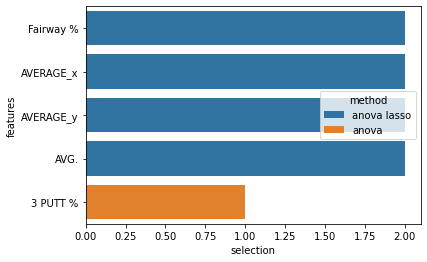

In [105]:
X = dtf_train.drop("Winner", axis=1).values
y = dtf_train["Winner"].values
feature_names = dtf_train.drop("Winner", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k='all').fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=5).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

In [110]:
X_train = dtf_train.drop(columns='Winner')
y_train = dtf_train["Winner"]
#X_test = dtf_test.drop(columns='Winner').values
#y_test = dtf_test["Winner"].values

In [111]:
#X_train = dtf_train.drop(columns='Winner').values
#y_train = dtf_train["Winner"].values
X_test = dtf_test

In [ ]:
## call model
model = ensemble.GradientBoostingClassifier()
## define hyperparameters combinations to try
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3],     #the minimum number of samples to form a leaf
'max_features':[2,3],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}       #the fraction of samples to be used for fitting the individual base learners. Values lower than 1 generally lead to a reduction of variance and an increase in bias.
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=1000, 
       scoring="accuracy").fit(X_train, y_train)
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

In [ ]:
cv = model_selection.StratifiedKFold(n_splits=3, shuffle=True)
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
   prediction = model.fit(X_train[train],
                y_train[train]).predict_proba(X_train[test])
   fpr, tpr, t = metrics.roc_curve(y_train[test], prediction[:, 1])
   tprs.append(scipy.interp(mean_fpr, fpr, tpr))
   roc_auc = metrics.auc(fpr, tpr)
   aucs.append(roc_auc)
   plt.plot(fpr, tpr, lw=2, alpha=0.3, )
   i = i+1
   
plt.plot([0,1], [0,1], linestyle='--', lw=2, color='black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue', label=r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation')
plt.legend(loc="lower right")
plt.show()

In [ ]:
X_train

In [ ]:
model.fit(X_train, y_train)
## test
predicted_prob = model.predict_proba(X_test)[:,1]
predicted = model.predict(X_test)

In [90]:
## Accuray e AUC
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy (overall correct predictions):",  round(accuracy,2))
print("Auc:", round(auc,2))
    
## Precision e Recall
recall = metrics.recall_score(y_test, predicted)
precision = metrics.precision_score(y_test, predicted)
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

ValueError: Found input variables with inconsistent numbers of samples: [65, 66]

In [92]:
predicted_prob

array([2.90212418e-03, 3.20742245e-03, 2.74125594e-03, 2.72178856e-03,
       1.03235602e-02, 4.25606306e-03, 1.94890831e-03, 6.35452268e-03,
       5.74088031e-03, 4.66863527e-01, 9.30660651e-04, 3.42910944e-03,
       9.31217378e-04, 2.33928875e-03, 7.83621916e-04, 1.44266844e-03,
       2.33928875e-03, 2.25606443e-03, 1.27910969e-03, 1.17888411e-03,
       1.17435576e-02, 4.84316959e-01, 7.44715389e-04, 4.04960537e-04,
       1.62653664e-03, 1.36046507e-03, 5.53490622e-03, 3.45433311e-03,
       3.21094114e-03, 9.10446564e-01, 4.59656513e-01, 1.51018644e-03,
       8.19832792e-04, 1.75504949e-03, 8.84771317e-04, 2.84041300e-03,
       2.21575367e-03, 2.94911310e-03, 1.59892626e-03, 2.11906051e-02,
       3.74742777e-03, 1.59892626e-03, 2.53615604e-04, 5.86631811e-04,
       1.36621803e-03, 6.76264212e-04, 1.93918348e-03, 1.49319217e-03,
       6.97038169e-04, 2.15040080e-03, 9.18527023e-04, 1.36621803e-03,
       1.51018644e-03, 3.15703918e-03, 1.75504949e-03, 7.47581557e-04,
      